# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [31]:
# Load pickled data
import cv2
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import sklearn
import tensorflow as tf
import sys
from sklearn.utils import shuffle
from math import ceil, pow
from tqdm import tqdm


# TODO: Fill this in based on where you saved the training and testing data


# Load pickled data
training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']
signnames = pd.read_csv('signnames.csv')['SignName']

print('>>>>>>>Data extraction done!!!<<<<<<<<')

>>>>>>>Data extraction done!!!<<<<<<<<


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [32]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(x_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = x_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

                                         Visulizaiton of Data by different type                                         



                                                  Speed limit (20km/h)                                                  


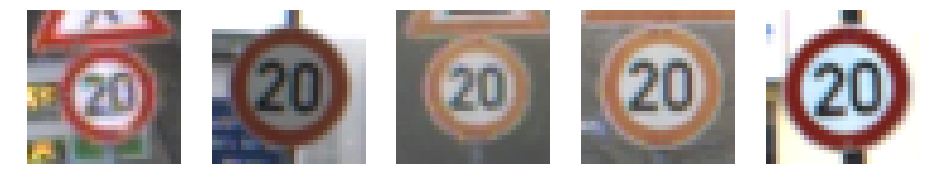

                                                  Speed limit (30km/h)                                                  


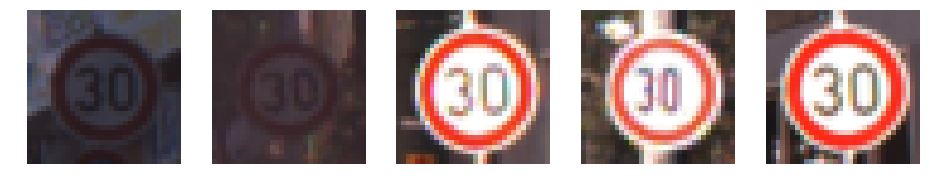

                                                  Speed limit (50km/h)                                                  


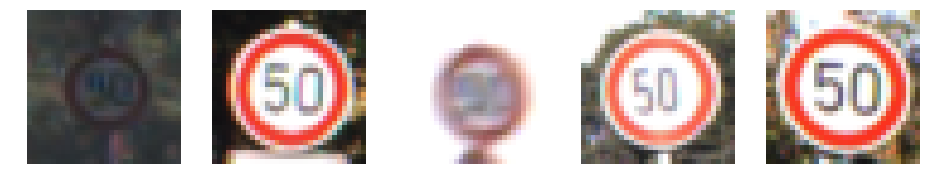

                                                  Speed limit (60km/h)                                                  


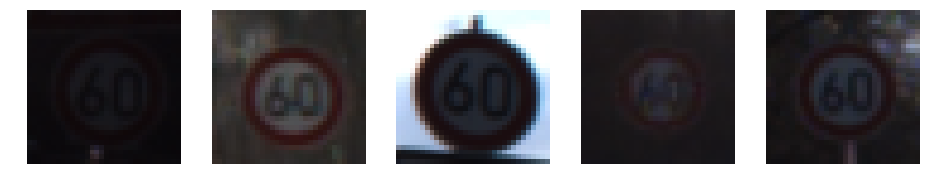

                                                  Speed limit (70km/h)                                                  


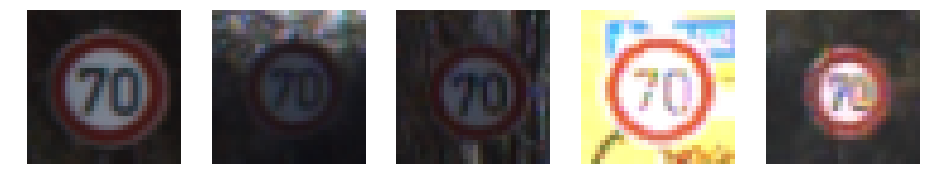

                                                  Speed limit (80km/h)                                                  


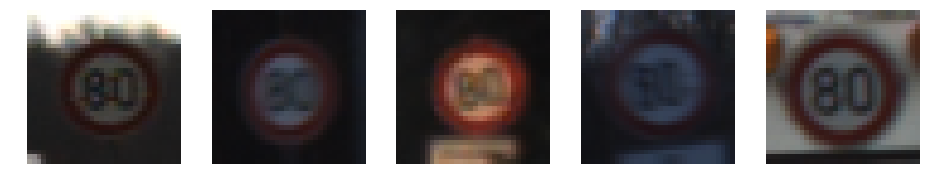

                                              End of speed limit (80km/h)                                               


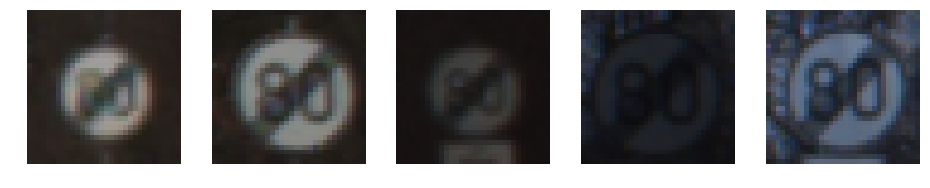

                                                 Speed limit (100km/h)                                                  


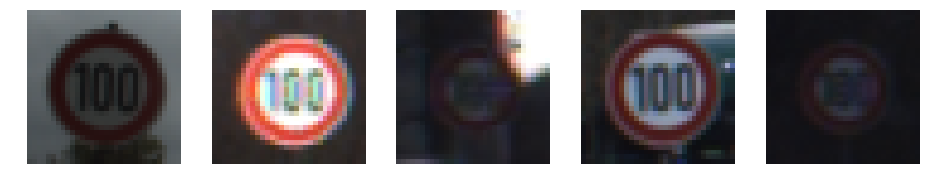

                                                 Speed limit (120km/h)                                                  


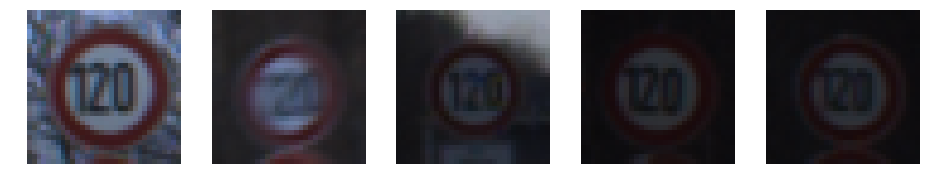

                                                       No passing                                                       


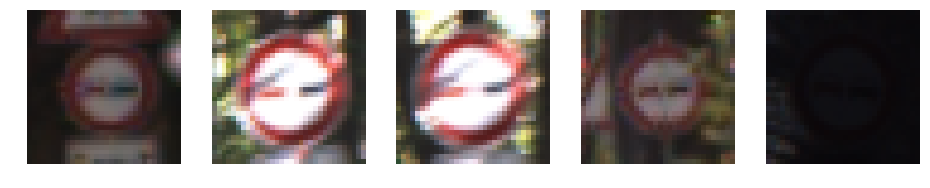

                                      No passing for vehicles over 3.5 metric tons                                      


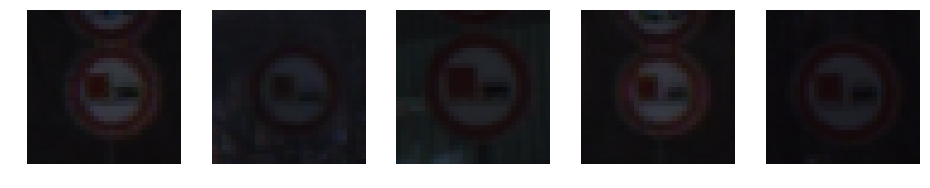

                                         Right-of-way at the next intersection                                          


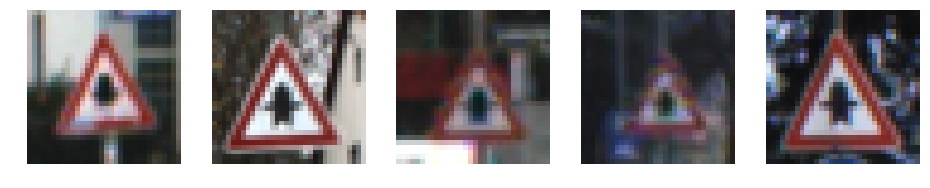

                                                     Priority road                                                      


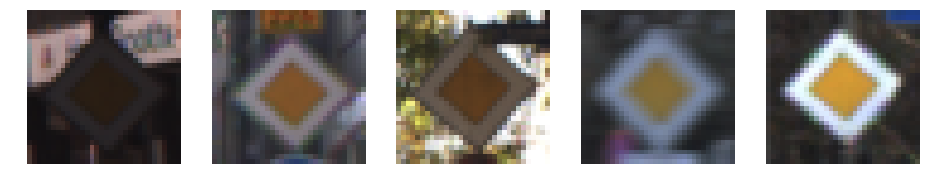

                                                         Yield                                                          


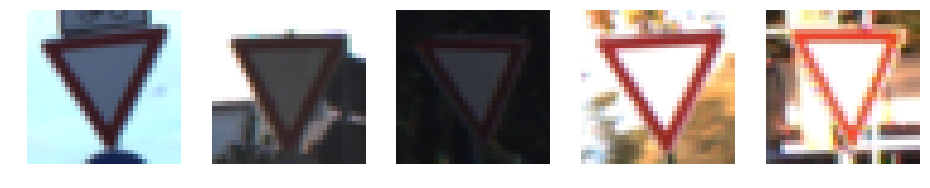

                                                          Stop                                                          


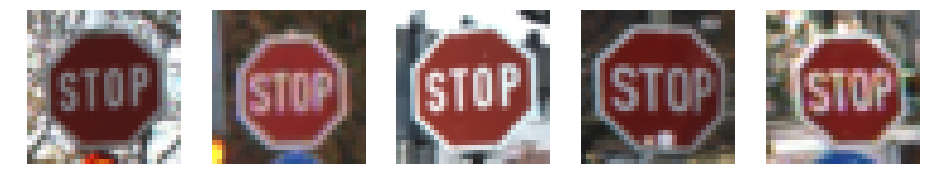

                                                      No vehicles                                                       


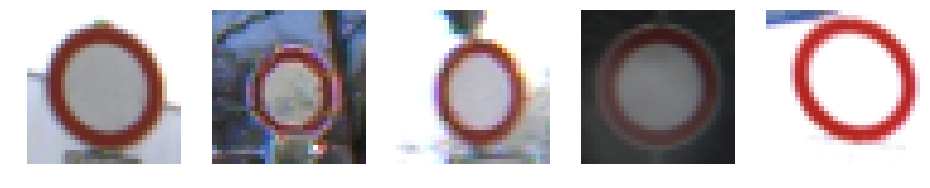

                                        Vehicles over 3.5 metric tons prohibited                                        


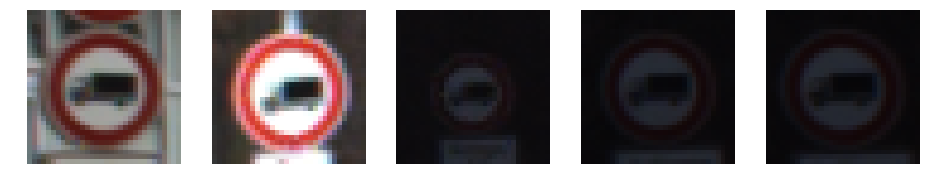

                                                        No entry                                                        


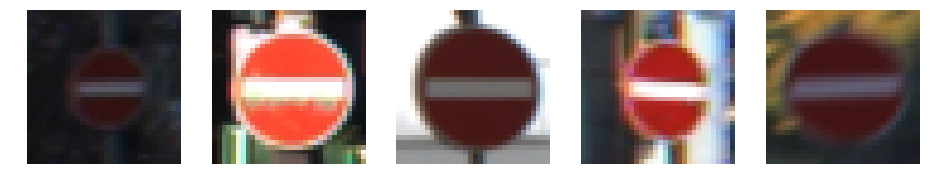

                                                    General caution                                                     


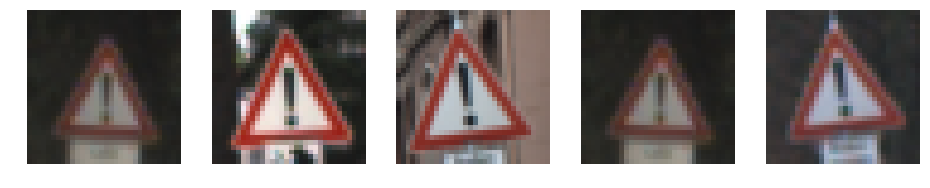

                                              Dangerous curve to the left                                               


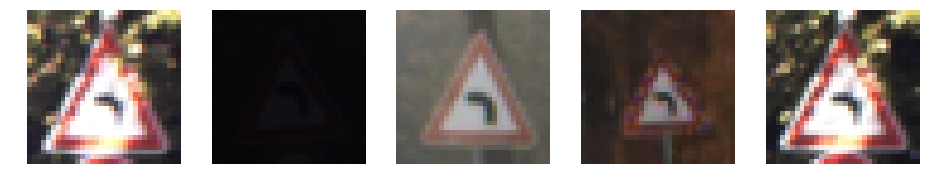

                                              Dangerous curve to the right                                              


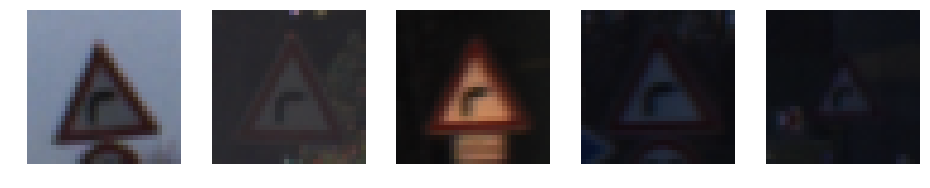

                                                      Double curve                                                      


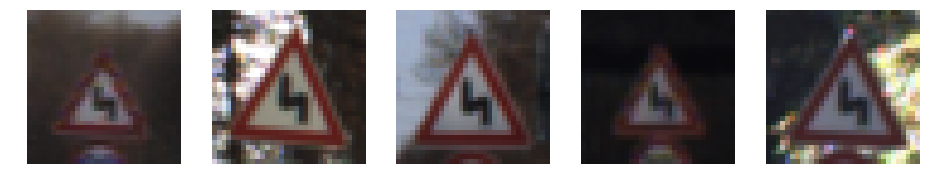

                                                       Bumpy road                                                       


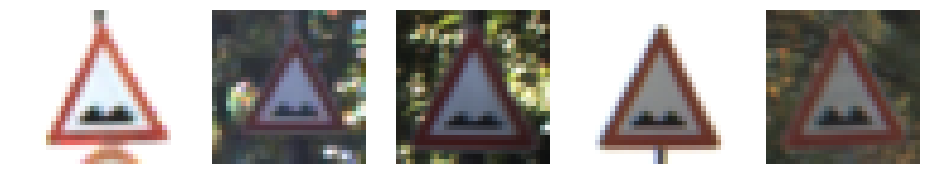

                                                     Slippery road                                                      


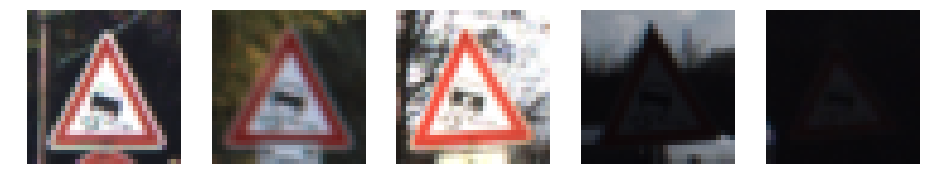

                                               Road narrows on the right                                                


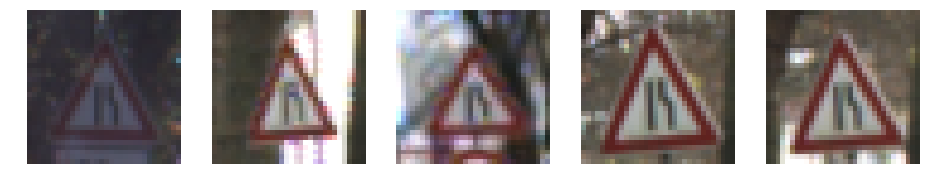

                                                       Road work                                                        


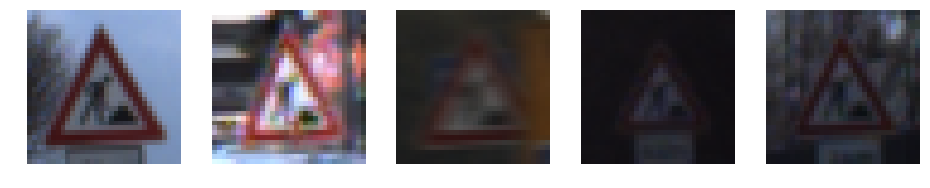

                                                    Traffic signals                                                     


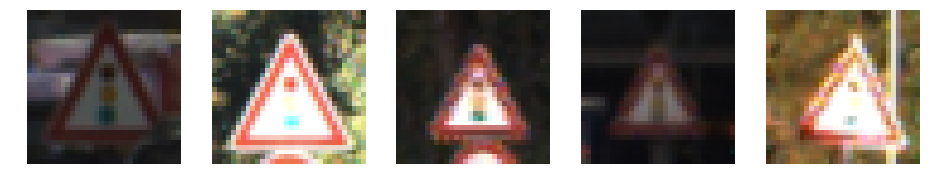

                                                      Pedestrians                                                       


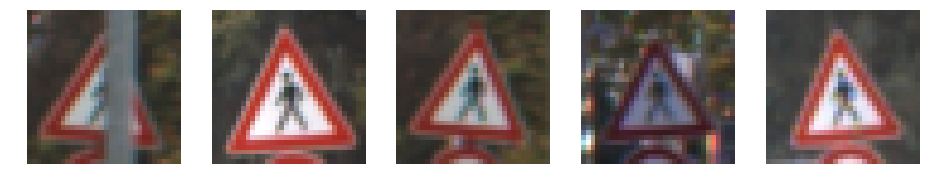

                                                   Children crossing                                                    


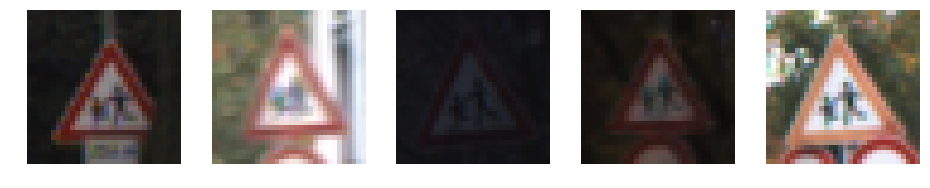

                                                   Bicycles crossing                                                    


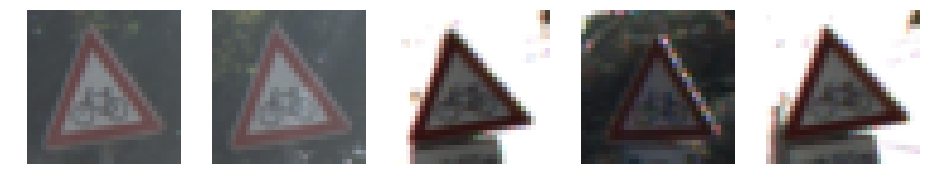

                                                   Beware of ice/snow                                                   


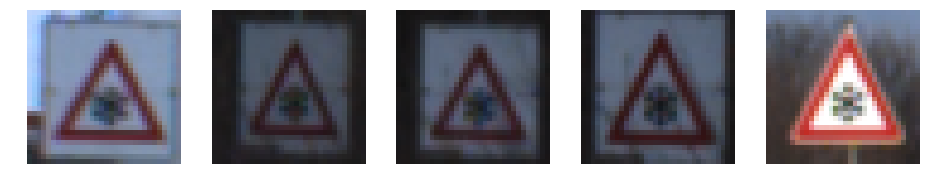

                                                 Wild animals crossing                                                  


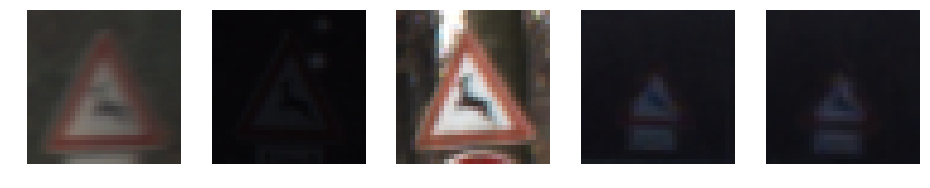

                                          End of all speed and passing limits                                           


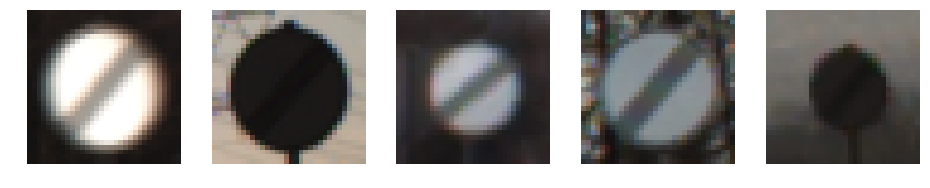

                                                    Turn right ahead                                                    


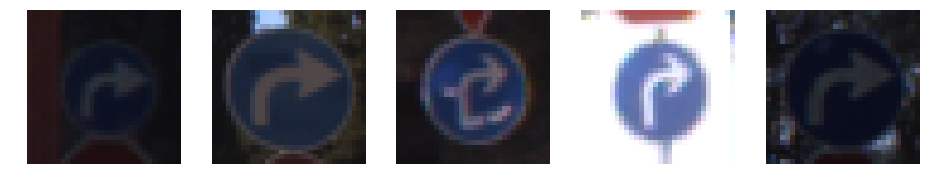

                                                    Turn left ahead                                                     


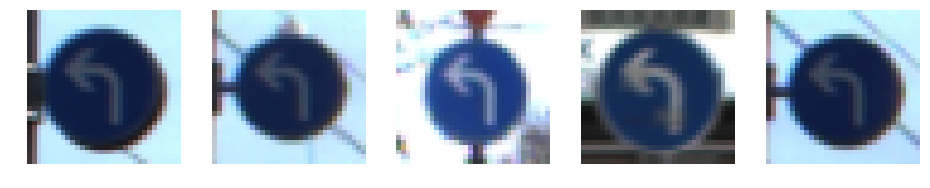

                                                       Ahead only                                                       


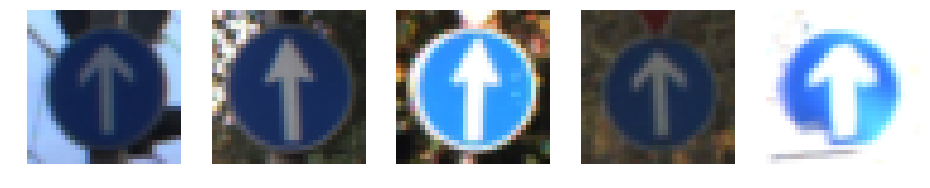

                                                  Go straight or right                                                  


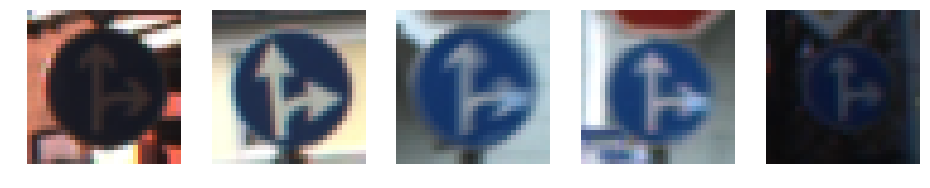

                                                  Go straight or left                                                   


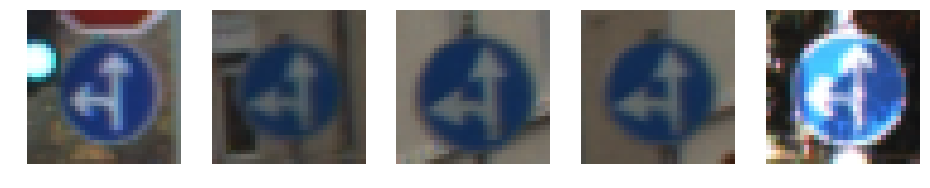

                                                       Keep right                                                       


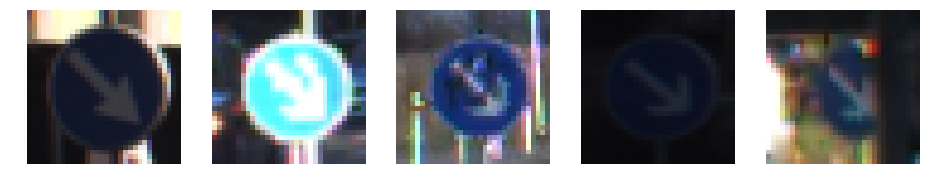

                                                       Keep left                                                        


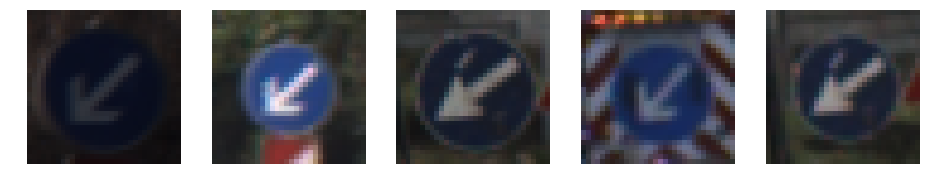

                                                  Roundabout mandatory                                                  


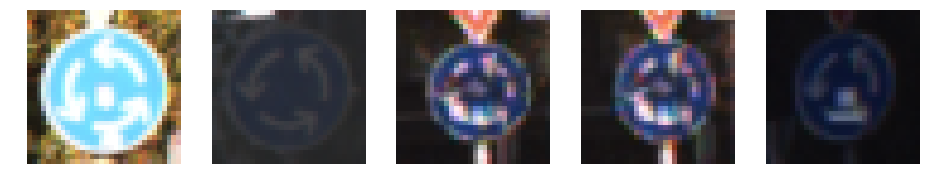

                                                   End of no passing                                                    


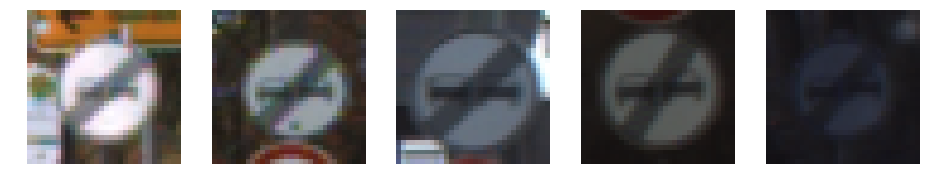

                                   End of no passing by vehicles over 3.5 metric tons                                   


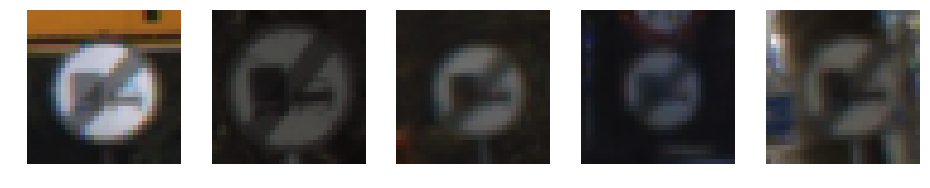

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.

print('Visulizaiton of Data by different type'.center(120))
print('='*120,'\n')
print('\n')

n = 5
for i in range(n_classes):
    idx = np.where(y_train == i)
    n_images = x_train[np.random.choice(idx[0], n)]
    #print(idx[0])
    #print(np.random.choice(idx[0], n))
    f, axes = plt.subplots(1, n)
    f.set_size_inches((16, 10))
    print(str(signnames[i]).center(120))
    for j, image in enumerate(n_images):
        axes[j].imshow(image)
        axes[j].grid(False)
        axes[j].axis('off')
    plt.show()

## Visulization of the data number distribution
---

                                         Visulization of the data distribution                                          





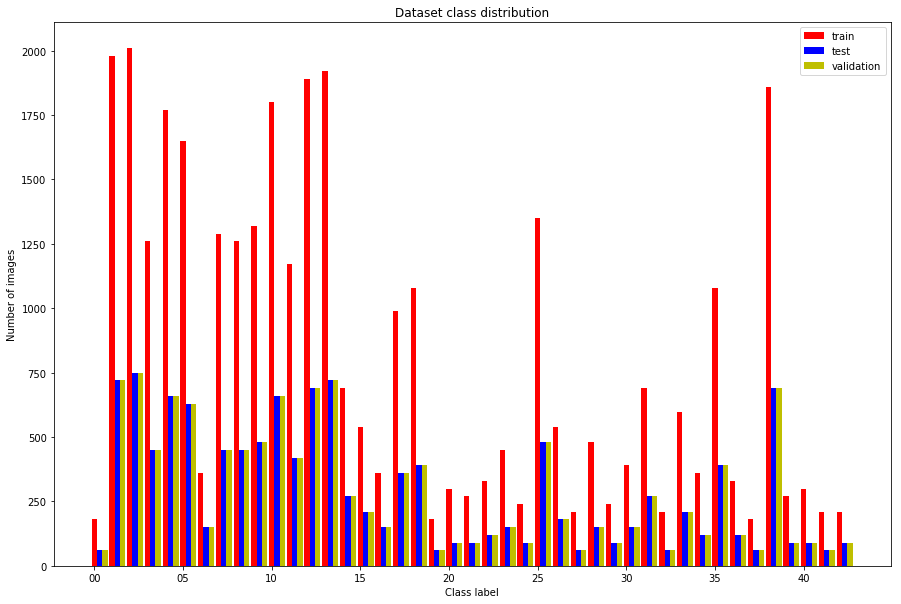

In [33]:
print('Visulization of the data distribution'.center(120))
print('='*126,'\n')
print('\n')
    
train_distribution, test_distribution, validation_distribution = np.zeros(n_classes), np.zeros(n_classes), np.zeros(n_classes)
for c in range(n_classes):
    train_distribution[c] = np.sum(y_train == c) #/ n_train
    test_distribution[c] = np.sum(y_test == c) #/ n_test
    validation_distribution[c] = np.sum(y_valid == c) #/ n_validation
fig, ax = plt.subplots()
fig.set_size_inches((15, 10))
col_width = 0.3
bar_train = ax.bar(np.arange(n_classes), train_distribution, width = col_width, color='r')
bar_test = ax.bar(np.arange(n_classes)+col_width, test_distribution, width=col_width, color='b')
bar_validation = ax.bar(np.arange(n_classes)+ 2 * col_width, test_distribution, width=col_width, color='y')
ax.set_ylabel('Number of images')
ax.set_xlabel('Class label')
ax.set_title('Dataset class distribution')
ax.set_xticks(np.arange(0, n_classes, 5) )
ax.set_xticklabels(['{:02d}'.format(c) for c in range(0, n_classes, 5)])
ax.legend((bar_train[0], bar_test[0], bar_validation[0]), ('train', 'test', 'validation'))
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [34]:
def preproImg(img):
    
    image = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2YUV))[0]
    
    image = cv2.equalizeHist(image)
    
    mini, maxi = np.min(image), np.max(image)
    image = (image - mini) / (maxi - mini) * 2 - 1
    
    image = np.expand_dims(image, axis=2)
    
    return image

def preproData(data):
    
    return np.array([preproImg(im) for im in data])

x_tr = preproData(x_train)
x_va = preproData(x_valid)
x_te = preproData(x_test)

                               Visulization of the data after preprocessing in grayscale                                





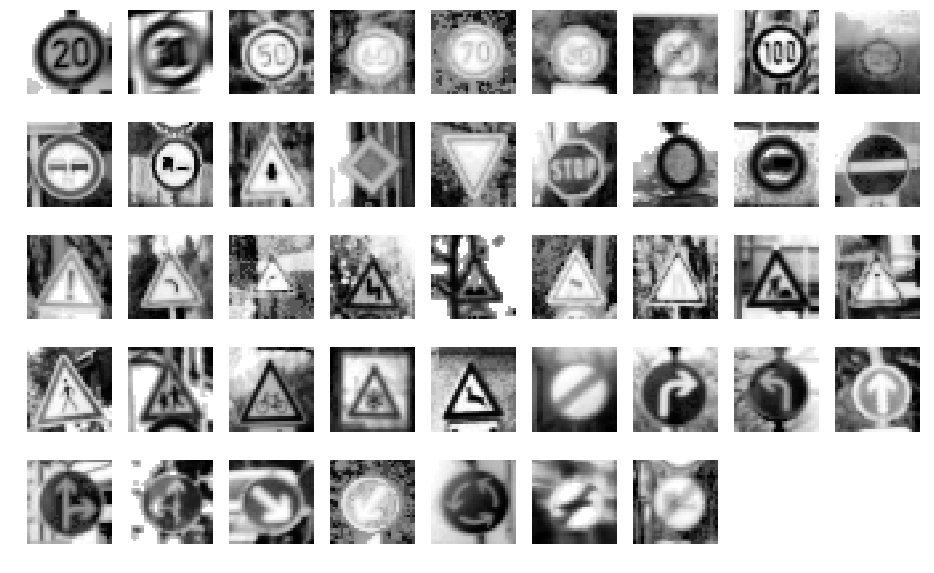

(32, 32, 1)


In [6]:
print('Visulization of the data after preprocessing in grayscale'.center(120))
print('='*126,'\n')
print('\n')
f, axes = plt.subplots(5, 9)
f.set_size_inches((16,10))

c = 0
for row in axes:
    for ax in row:
        if c < n_classes:
            im = (x_tr[np.random.choice(np.where(y_train == c)[0], 1)] + 1) / 2
            ax.imshow(im[0,:,:,0], cmap = 'gray')
        ax.grid(False)
        ax.axis('off')
        c += 1
plt.show()
print(x_tr.shape[1:])

In [35]:
def rotate(image, angle=15):
    angle = np.random.randint(-angle, angle)
    M = cv2.getRotationMatrix2D((16, 16), angle, 1)
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))


def translate(image, pixels=2):
    tx = np.random.choice(range(-pixels, pixels))
    ty = np.random.choice(range(-pixels, pixels))
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))


def random_bright(image):
    eff = 0.5 + np.random.random()
    return image * eff

def normalize_im(image):
    mini, maxi = np.min(image), np.max(image)
    return (image - mini) / (maxi - mini) * 2 - 1

def generate(images, count):
    generated = []
    while True:
        for image in images:
            if len(generated) == count:
                return generated
            image = random_bright(image)
            image = rotate(image)
            image = translate(image)
            image = normalize_im(image)
            generated.append(np.expand_dims(image, axis=2))


unique, counts = np.unique(y_train, return_counts=True)

target = 5000
x_augmented = []
y_augmented = []

for cls, count in tqdm(list(zip(unique, counts)), 'Augmenting training dataset'):
    diff = target - count
    x_augmented += generate(x_tr[np.where(y_train == cls)[0]], diff)
    y_augmented += [cls for _ in range(diff)]

x_train_final = np.concatenate([x_tr, np.array(x_augmented)])
y_train = np.concatenate([y_train, np.array(y_augmented)])
n_train = y_train.size
print('Final number of training examples', n_train)

Augmenting training dataset: 100%|██████████| 43/43 [00:27<00:00,  1.47it/s]


Final number of training examples 215000


### Model Architecture

In [36]:
def conv2d(x, kernel, input_depth, output_depth, stride=1, padding='VALID', mu=0, sigma=0.1):
    shape = (kernel, kernel, input_depth, output_depth)
    W = tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(output_depth))
    conv = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding=padding)
    conv = tf.nn.bias_add(conv, b)
    return conv


def fully(x, input_size, output_size, mu=0, sigma=0.1):
    W = tf.Variable(tf.truncated_normal(shape=(input_size, output_size), mean=mu, stddev=sigma))
    b = tf.Variable(tf.zeros(output_size))
    fc = tf.matmul(x, W)
    fc = tf.add(fc, b)
    return fc


def max_pool(x, size, padding='VALID'):
    return tf.nn.max_pool(x, ksize=[1, size, size, 1], strides=[1, size, size, 1], padding=padding)


def LeNet(x, keep_prob):
    mu=0
    sigma=0.1
    
    # 3x3 convolution with ReLU activation
    conv1 = conv2d(x, 3, 1, 12)
    conv1 = tf.nn.relu(conv1)
    print(conv1.shape)


    # 3x3 convolution with ReLU activation
    conv1 = conv2d(conv1, 3, 12, 24)
    conv1 = tf.nn.relu(conv1)
    pool1 = max_pool(conv1, 2)
    print(conv1.shape)
    print(pool1.shape)

    
    # 5x5 convolution with ReLU activation
    conv2 = conv2d(pool1, 5, 24, 36)
    conv2 = tf.nn.relu(conv2)
    print(conv2.shape)

    # 5x5 convolution with ReLU activation
    conv2 = conv2d(conv2, 5, 36, 48)
    conv2 = tf.nn.relu(conv2)
    pool2 = max_pool(conv2, 2)
    print(conv2.shape)
    print(pool2.shape)

    
    # Flatten and Concatenate
    flat1 = tf.contrib.layers.flatten(pool1)
    flat2 = tf.contrib.layers.flatten(pool2)
    flattened = tf.concat([flat1, flat2], axis=1)
    print(flattened.shape)


    # First fully connected with 512 neurons and dropout to reduce variance
    fully1 = fully(flattened, 5136, 512)
    fully1 = tf.nn.relu(fully1)
    fully1 = tf.nn.dropout(fully1, keep_prob)
    print(fully1.shape)


    # Second fully connected with 256 neurons and dropout to reduce variance
    fully2 = fully(fully1, 512, 256)
    fully2 = tf.nn.relu(fully2)
    fully2 = tf.nn.dropout(fully2, keep_prob)
    print(fully2.shape)


    # Output layer
    return fully(fully2, 256, n_classes), conv1, conv2

In [37]:
def generator(x_data, y_data, batch_size, shuffle=False):
    if shuffle:
        x_data, y_data = sklearn.utils.shuffle(x_data, y_data)
    gen = range(0, len(x_data), batch_size)
    for offset in gen:
        end = offset + batch_size
        yield x_data[offset:end], y_data[offset:end]

def evaluate(x_data, y_data):
    total_accuracy = 0
    sess = tf.get_default_session()
    gen = generator(x_data, y_data, batch_size=batch_size)
    for x_batch, y_batch in gen:
        accuracy = sess.run(accuracy_operation, feed_dict={x: x_batch, y: y_batch, kp: 1.0})
        total_accuracy += (accuracy * len(x_batch))
    return total_accuracy / len(x_data)

batch_size = 32
keep_prob = .7
epochs = 30
patience = 5

tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
kp = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

learning_rate = 0.0001

logits, conv1, conv2 = LeNet(x, kp)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

(?, 30, 30, 12)
(?, 28, 28, 24)
(?, 14, 14, 24)
(?, 10, 10, 36)
(?, 6, 6, 48)
(?, 3, 3, 48)
(?, 5136)
(?, 512)
(?, 256)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [39]:
best_epoch = 0
best_val_acc = 0
history = []
modelname = 'model'

with tf.Session() as sess:
    if os.path.exists('checkpoint'):
        print('Restore {}.cktp to continue training'.format(modelname))
        saver.restore(sess, tf.train.latest_checkpoint('.'))
    else:
        print("Training {}...".format(modelname))
        sess.run(tf.global_variables_initializer())

    try:
        for i in range(epochs):
            desc = "EPOCH {} ...".format(i + 1)
            sys.stdout.flush()
            for x_batch, y_batch in generator(x_train_final, y_train, batch_size=batch_size, shuffle=True):
                sess.run(training_operation, feed_dict={x: x_batch, y: y_batch, kp: keep_prob})

            train_acc = evaluate(x_train_final, y_train)
            val_acc = evaluate(x_va, y_valid)
            print("Training Accuracy = {:.3f}".format(train_acc))
            print("Validation Accuracy = {:.3f}".format(val_acc))

            history.append([train_acc, val_acc])
            if val_acc > best_val_acc:
                best_epoch, best_val_acc = i, val_acc
                saver.save(sess, './{}.ckpt'.format(modelname))
                print("Model saved")
            else:
                if i - best_epoch == patience:
                    print('Stopping after {} epochs without improvement'.format(patience))
                    break
    except KeyboardInterrupt:
        pass

Training model...
Training Accuracy = 0.961
Validation Accuracy = 0.937
Model saved
Training Accuracy = 0.989
Validation Accuracy = 0.968
Model saved
Training Accuracy = 0.995
Validation Accuracy = 0.974
Model saved
Training Accuracy = 0.998
Validation Accuracy = 0.975
Model saved
Training Accuracy = 0.998
Validation Accuracy = 0.976
Model saved
Training Accuracy = 0.999
Validation Accuracy = 0.982
Model saved
Training Accuracy = 0.999
Validation Accuracy = 0.981
Training Accuracy = 1.000
Validation Accuracy = 0.983
Model saved
Training Accuracy = 1.000
Validation Accuracy = 0.986
Model saved
Training Accuracy = 1.000
Validation Accuracy = 0.988
Model saved
Training Accuracy = 1.000
Validation Accuracy = 0.986
Training Accuracy = 1.000
Validation Accuracy = 0.982
Training Accuracy = 1.000
Validation Accuracy = 0.986
Training Accuracy = 1.000
Validation Accuracy = 0.986
Training Accuracy = 1.000
Validation Accuracy = 0.985
Stopping after 5 epochs without improvement


### test accuracy

In [40]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print('Test accuracy: {:.3f}%'.format(evaluate(x_te, y_test) * 100))

INFO:tensorflow:Restoring parameters from ./model.ckpt
Test accuracy: 96.690%


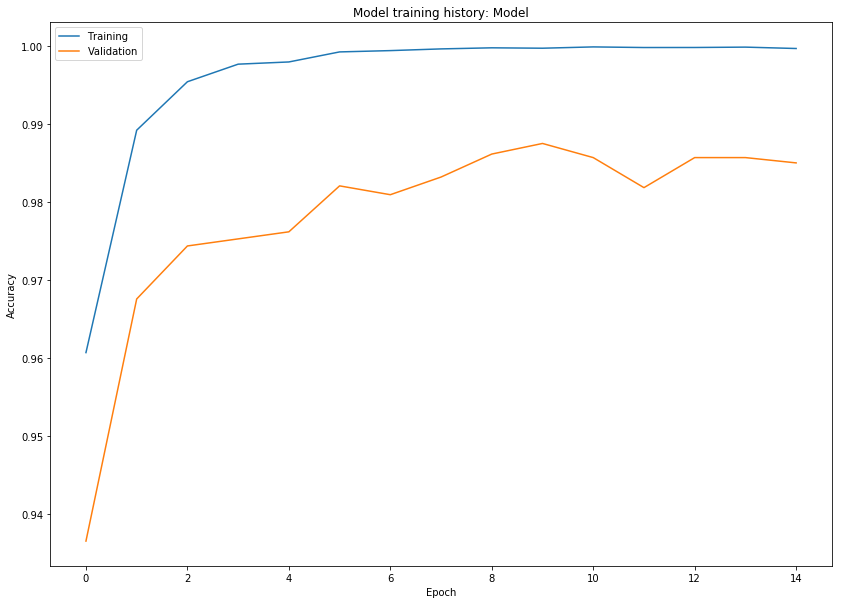

In [43]:
def plot_history(history, modelname):
    plt.figure(figsize=(14,10))
    plt.title('Model training history: {}'.format(modelname))
    plt.plot(history)
    plt.legend(['Training', 'Validation'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

plot_history(history, 'Model')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

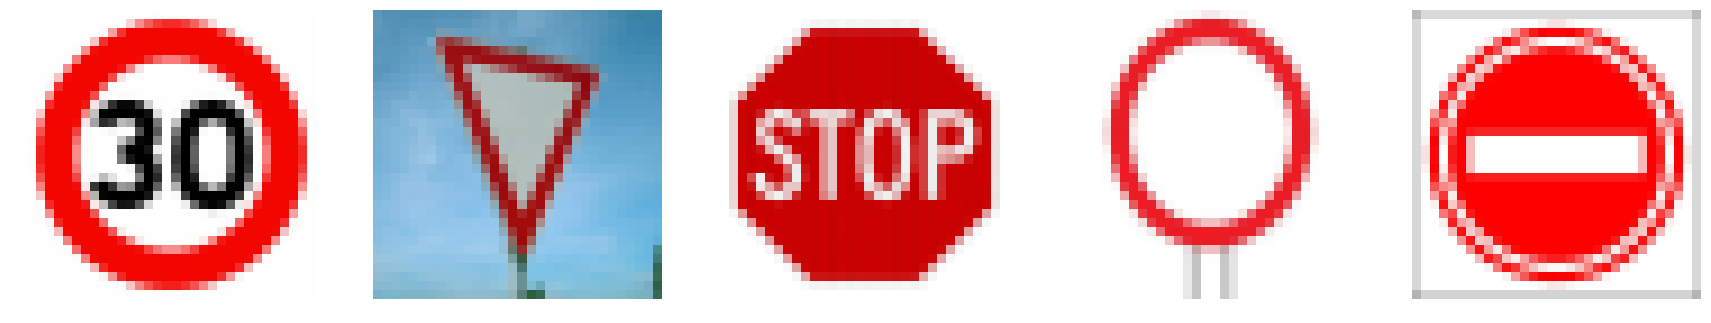

In [53]:
def pre_process(images):
    cpy = np.copy(images)
    normalized = (cpy - 128.0)/128.0
    gray = np.sum(normalized*np.array([0.299, 0.587, 0.114]), axis=3, keepdims=True)
    return gray

def read_resize(file):
    read_file = cv2.imread(file)
    if (read_file) is not None:
        return cv2.resize(cv2.cvtColor(read_file, cv2.COLOR_BGR2RGB),(32,32),interpolation=cv2.INTER_AREA)
    else:
        print("cv2 cannot read image")
        return None
    
def pre_process(images):
    cpy = np.copy(images)
    normalized = (cpy - 128.0)/128.0
    gray = np.sum(normalized*np.array([0.299, 0.587, 0.114]), axis=3, keepdims=True)
    return gray

test_files=["signs/label1.jpg", 
            "signs/label13.jpg", 
            "signs/label14.jpg", 
            "signs/label15.png", 
            "signs/label17.jpg",]

test_images = np.empty([5,32,32,3], dtype=np.uint8)
plt.figure(figsize=(30,30))
for i, file in enumerate(test_files):
    test_images[i] = read_resize(file)
    if(test_images[i] is not None):
        plt.subplot(1,5,i+1)
        plt.imshow(test_images[i])
        plt.axis('off')

### Predict the Sign Type for Each Image

### Analyze Performance

In [54]:
my_images = test_images
test_images = pre_process(test_images)

sign_labels = [1,13,14,15,17]

#evaluate the model accuracy on new images.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./model.ckpt.meta')
    saver3.restore(sess, "./model.ckpt")
    sign_accuracy = evaluate(test_images, sign_labels)
    print("Test signs Accuracy = {:.2f}".format(sign_accuracy))

INFO:tensorflow:Restoring parameters from ./model.ckpt
Test signs Accuracy = 1.00


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./model.ckpt


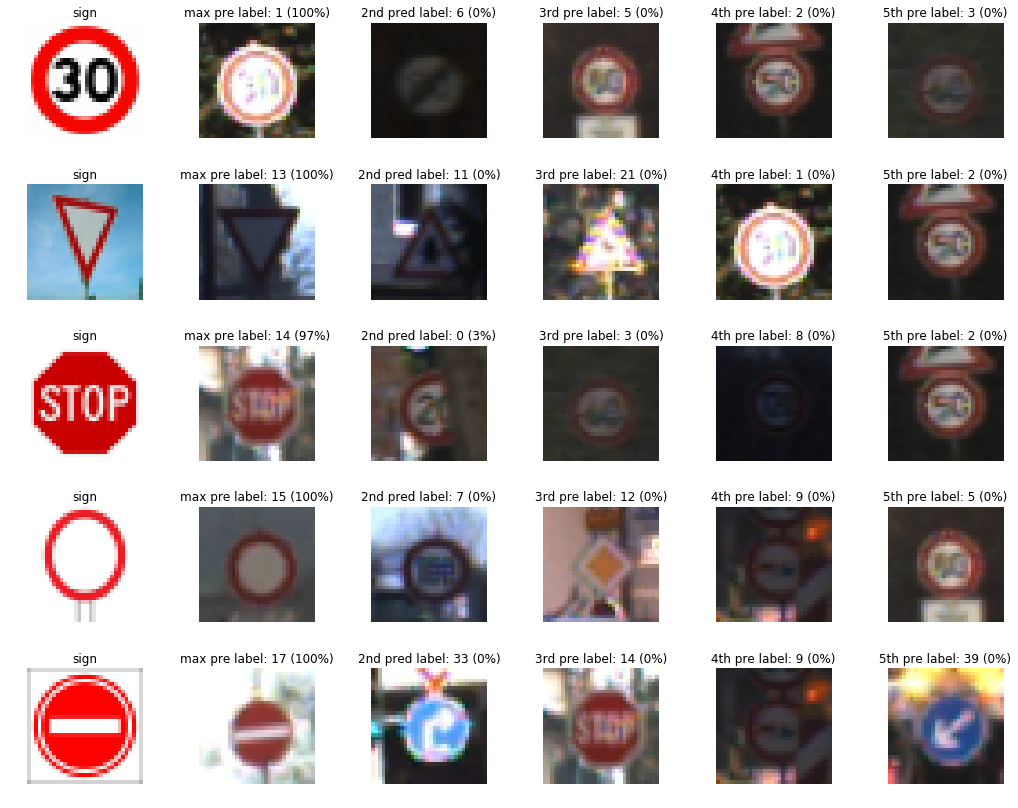

In [55]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./model.ckpt.meta')
    saver.restore(sess, "./model.ckpt")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: test_images, kp: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: test_images, kp: 1.0})

    
    fig, axs = plt.subplots(len(my_images),6, figsize=(18, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[6*i].axis('off')
        axs[6*i].imshow(image)
        axs[6*i].set_title('sign')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[6*i+1].axis('off')
        axs[6*i+1].imshow(x_valid[index1].squeeze())
        axs[6*i+1].set_title('max pre label: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[6*i+2].axis('off')
        axs[6*i+2].imshow(x_valid[index2].squeeze())
        axs[6*i+2].set_title('2nd pred label: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[6*i+3].axis('off')
        axs[6*i+3].imshow(x_valid[index3].squeeze())
        axs[6*i+3].set_title('3rd pre label: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
        guess4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_valid == guess4)[0]
        axs[6*i+4].axis('off')
        axs[6*i+4].imshow(x_valid[index4].squeeze())
        axs[6*i+4].set_title('4th pre label: {} ({:.0f}%)'.format(guess4, 100*my_top_k[0][i][3]))
        guess5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_valid == guess5)[0]
        axs[6*i+5].axis('off')
        axs[6*i+5].imshow(x_valid[index5].squeeze())
        axs[6*i+5].set_title('5th pre label: {} ({:.0f}%)'.format(guess5, 100*my_top_k[0][i][4]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from ./model.ckpt
Feature maps for Keep right


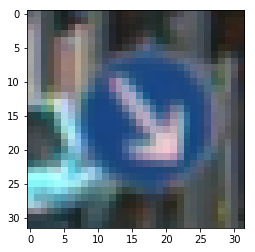

First convolutional layer
Second convolutional layer


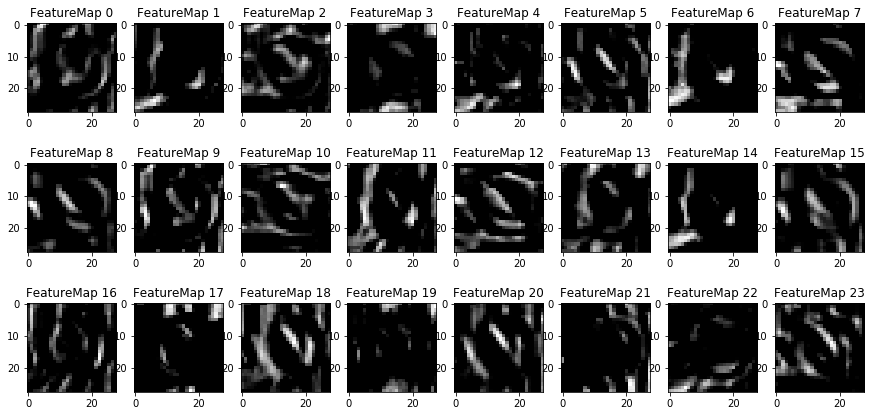

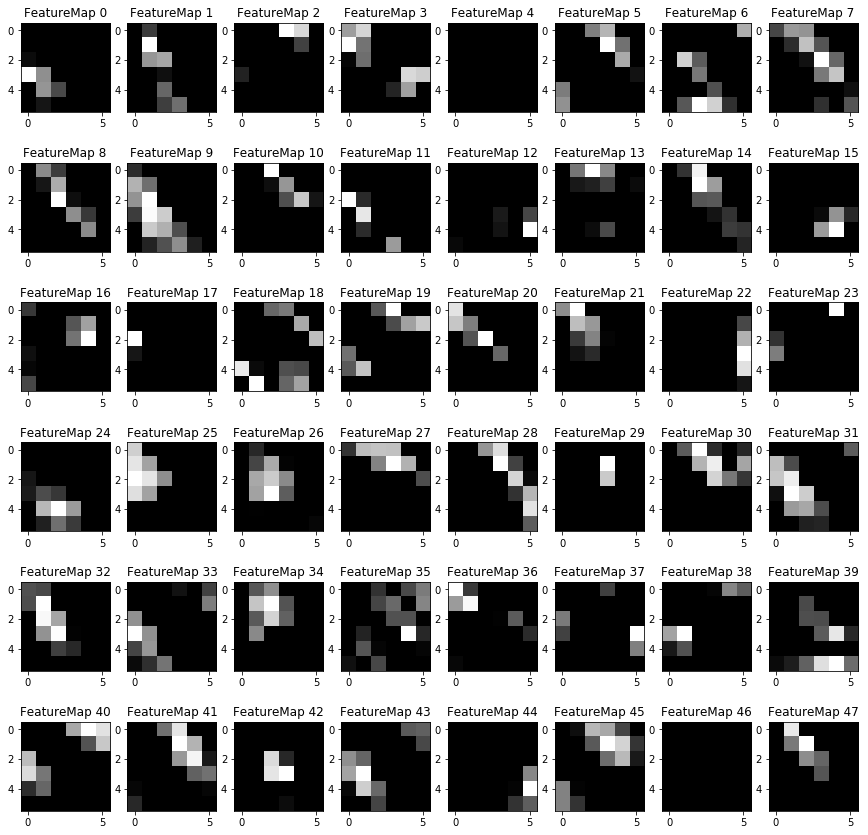

In [57]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
        

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    ix = int(np.random.random() * x_te.shape[0])
    random_image = np.expand_dims(x_te[ix], axis=0)
    print('Feature maps for', signnames[y_test[ix]])
    plt.imshow(x_test[ix])
    plt.show()
    print('First convolutional layer')
    outputFeatureMap(random_image, conv1, plt_num=1)
    print('Second convolutional layer')
    outputFeatureMap(random_image, conv2, plt_num=2)